# Import Library

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Data Preparation

Data Understanding

In [163]:
# Load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [164]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [165]:
# Get statistical info from dataset
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [166]:
# Show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

Encoding

In [167]:
# duplicate df
df_encoded = df.copy()
# Ordinal Encoding
education_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
df_encoded['Education'] = df_encoded['Education'].map(education_mapping)

# Display the DataFrame with the encoded Education column
display(df_encoded.head())

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


# Exploratory Data Analysis

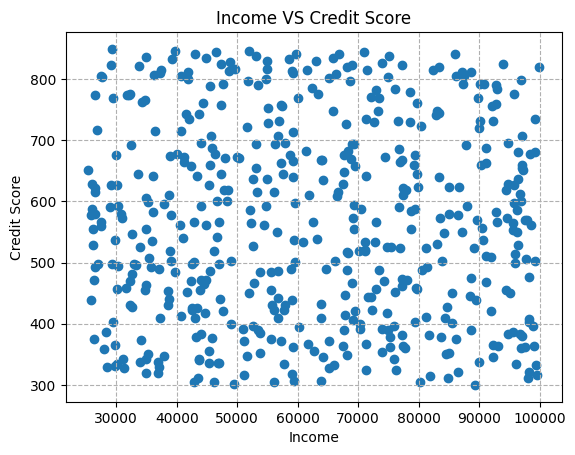

In [168]:
plt.scatter(df['Income'], df['Credit_Score'])
plt.title('Income VS Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.grid(axis='both', linestyle='--')
plt.show()

Insight :
Income does not appear to be a meaningful predictor of credit score—customers across all income levels show wide variations in credit score performance.

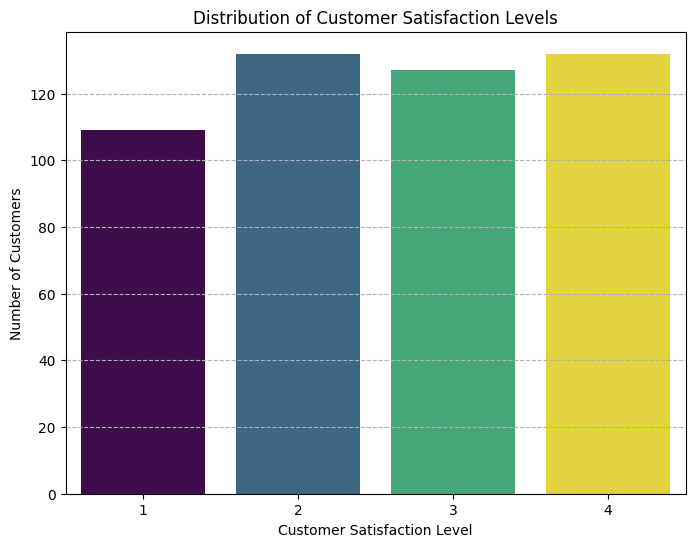

In [169]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer_Satisfaction', data=df, palette='viridis', hue='Customer_Satisfaction', legend=False)
plt.title('Distribution of Customer Satisfaction Levels')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--')
plt.show()

Insight :
1. Customer satisfaction is generally positive, with the majority of customers reporting mid-to-high satisfaction levels.
2. Only a small segment of customers reports low satisfaction, suggesting service quality issues are not widespread but worth investigating.

# Data Scaling (Choose One)

In [170]:
# Scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler
# Numerical Columns
num_cols = [
    'Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count',
    'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity'
]

# Categorical Columns
cat_cols = ['Education', 'Customer_Satisfaction']

sc = StandardScaler()

df_scaled_num = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)
df_sc_scaled = pd.concat([df_scaled_num, df[cat_cols].reset_index(drop=True)], axis=1)
df_sc_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,Bachelor,1
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,High School,2
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,High School,3
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,High School,4
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,Bachelor,4


# K-Means Clustering

In [171]:
from sklearn.cluster import KMeans

Scaled Dataset

In [172]:
from sklearn.preprocessing import StandardScaler
num_cols = [
    'Income', 'Age', 'Education', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count',
    'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Customer_Satisfaction', 'Online_Activity'
]

sc = StandardScaler()

# Apply StandardScaler to the selected columns from df_encoded
df_scaled_array = sc.fit_transform(df_encoded[num_cols])
df_sc_scaled = pd.DataFrame(df_scaled_array, columns=num_cols)

# Display the DataFrame with the scaled columns
df_sc_scaled.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,0.179150,1.303097,-0.356980,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013
1,0.749977,1.533191,-1.240593,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427
2,0.364249,0.459420,-1.240593,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595
3,0.165665,0.152629,-1.240593,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907
4,-0.250263,-0.307558,-0.356980,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898


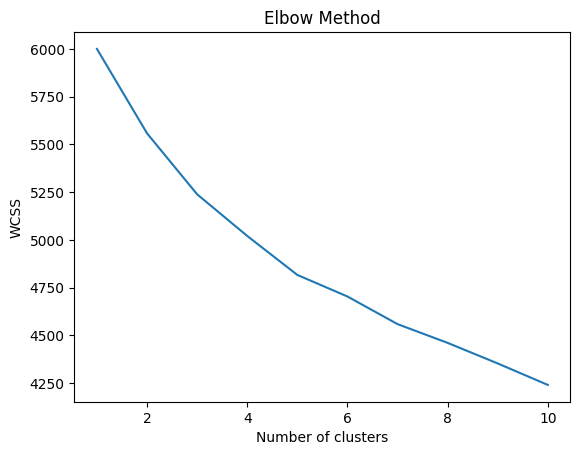

In [173]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [174]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  6000.000000
1                   2  5557.754906
2                   3  5238.300710
3                   4  5020.198726
4                   5  4816.052004
5                   6  4703.078672
6                   7  4558.345214
7                   8  4460.106654
8                   9  4352.305998
9                  10  4239.888582


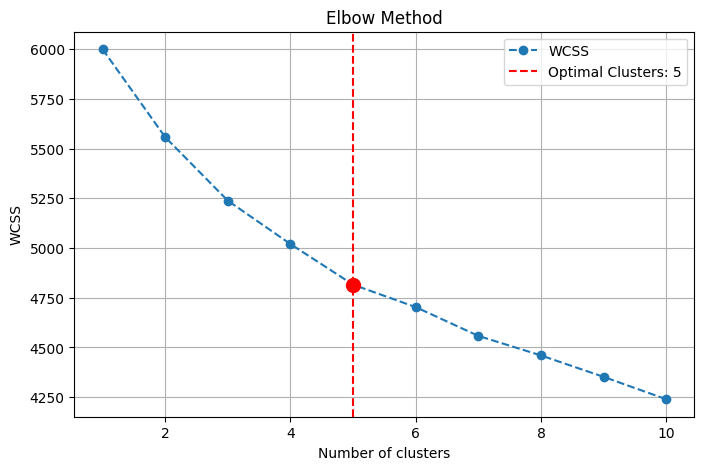

The optimal number of clusters is: 5


In [175]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [176]:
# Fit K-Means to the data with the optimal number of K cluster = 5
kmeans_scaled = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
scaled_clusters = kmeans_scaled.fit_predict(df_sc_scaled)
df['Scaled_K-Means_Cluster'] = scaled_clusters
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Scaled_K-Means_Cluster
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,2
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,2


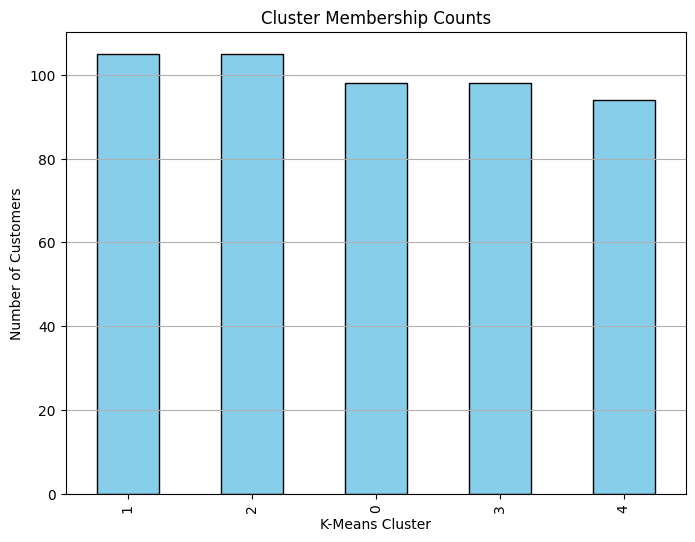

In [177]:
cluster_counts = df['Scaled_K-Means_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [178]:
fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color='Scaled_K-Means_Cluster',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Income vs Credit Score',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Credit_Score': 'Credit Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

In [179]:
# Group the data by scaled cluster and calculate the mean spending and annual income for each cluster
cluster_summary_scaled = df.groupby('Scaled_K-Means_Cluster').agg({'Age': ['mean', 'min', 'max'],
                                            'Income': ['mean', 'min', 'max'],
                                            'Credit_Score': ['mean', 'min', 'max']})

cluster_summary_scaled = cluster_summary_scaled.rename_axis('Scaled_K-Means_Cluster')

display(cluster_summary_scaled)

Age                Income               \
                             mean min max          mean          min   
Scaled_K-Means_Cluster                                                 
0                       44.275510  18  64  72548.400801  26232.22222   
1                       39.190476  18  64  61353.500126  26516.37981   
2                       41.295238  18  64  48488.924951  25857.05940   
3                       31.000000  18  63  71112.460833  25352.16071   
4                       44.436170  18  63  58619.068954  25992.76433   

                                    Credit_Score            
                                max         mean  min  max  
Scaled_K-Means_Cluster                                      
0                       99128.03785   554.428571  300  841  
1                       99580.05922   493.200000  302  844  
2                       98257.08161   496.304762  307  840  
3                       99913.52549   675.071429  351  846  
4                       98234.45988   618.159574  361  849

Unscaled Dataset

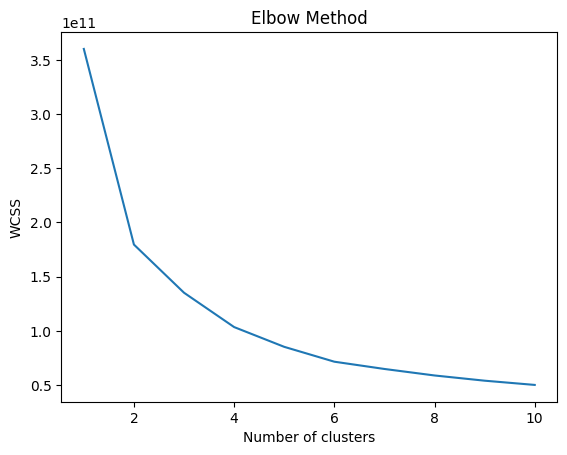

In [180]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [181]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters          WCSS
0                   1  3.601357e+11
1                   2  1.796223e+11
2                   3  1.351798e+11
3                   4  1.034966e+11
4                   5  8.526114e+10
5                   6  7.154790e+10
6                   7  6.483984e+10
7                   8  5.884440e+10
8                   9  5.402805e+10
9                  10  5.012191e+10


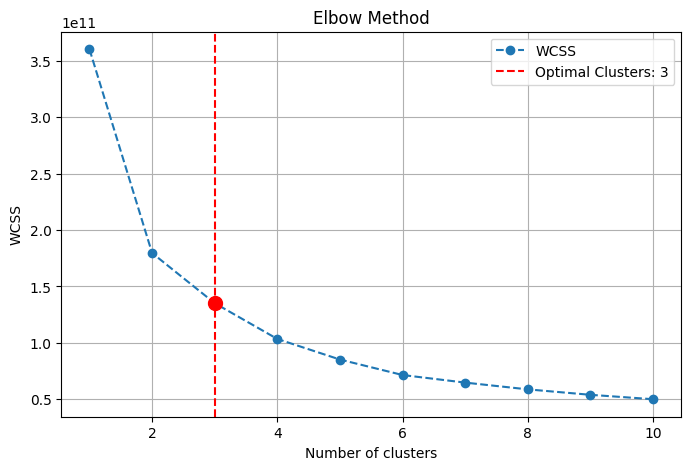

The optimal number of clusters is: 3


In [182]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [183]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans_unscaled = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
unscaled_clusters = kmeans_unscaled.fit_predict(df_encoded)
df['Unscaled_K-Means_Cluster'] = unscaled_clusters
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Scaled_K-Means_Cluster,Unscaled_K-Means_Cluster
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1,0
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0,1
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,2,1
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0,2
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,2,2


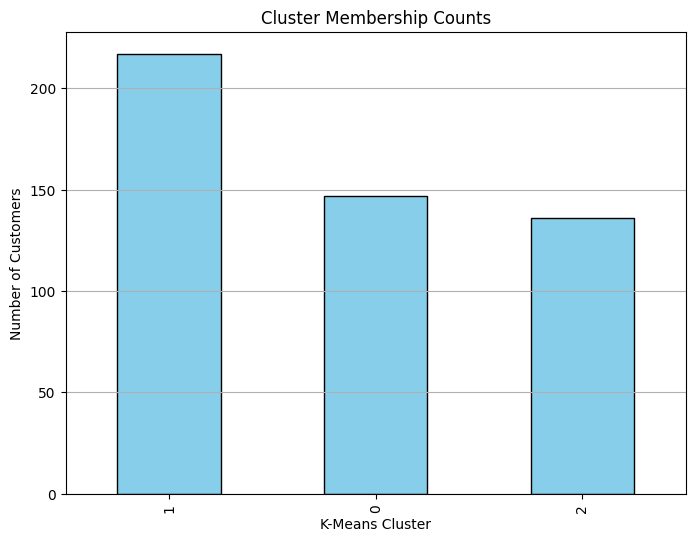

In [184]:
cluster_counts = df['Unscaled_K-Means_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [185]:
fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color='Unscaled_K-Means_Cluster',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Income vs Credit Score',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Credit_Score': 'Credit Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

In [186]:
# Group the data by unscaled cluster and calculate the for each cluster
cluster_summary_unscaled = df.groupby('Unscaled_K-Means_Cluster').agg({'Age': ['mean', 'min', 'max'],
                                            'Income': ['mean', 'min', 'max'],
                                            'Credit_Score': ['mean', 'min', 'max']})

cluster_summary_unscaled = cluster_summary_unscaled.rename_axis('Unscaled_K-Means_Cluster')

display(cluster_summary_unscaled)

Age                Income               \
                               mean min max          mean          min   
Unscaled_K-Means_Cluster                                                 
0                         40.537415  18  63  43512.790209  25878.55631   
1                         40.152074  18  64  83605.930546  63912.63616   
2                         39.213235  18  64  48408.415188  25352.16071   

                                      Credit_Score            
                                  max         mean  min  max  
Unscaled_K-Means_Cluster                                      
0                         66414.43524   568.210884  302  849  
1                         99913.52549   557.866359  300  844  
2                         71322.66228   572.882353  305  846

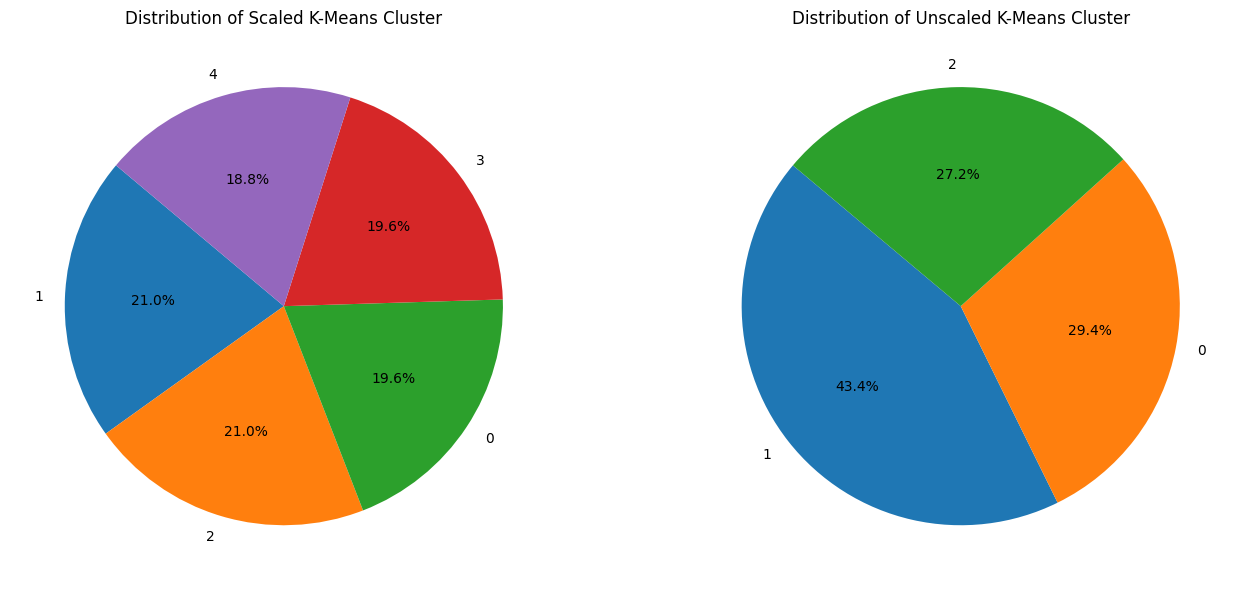

In [187]:
plt.figure(figsize=(14, 6))

# Counts of each unique value in the 'Scaled_K-Means_Cluster' column
plt.subplot(1, 2, 1)
y_counts_scaled = df['Scaled_K-Means_Cluster'].value_counts()
plt.pie(
    y_counts_scaled,
    labels=y_counts_scaled.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Scaled K-Means Cluster')

# Counts of each unique value in the 'Unscaled_K-Means_Cluster' column
plt.subplot(1, 2, 2)
y_counts_unscaled = df['Unscaled_K-Means_Cluster'].value_counts()
plt.pie(
    y_counts_unscaled,
    labels=y_counts_unscaled.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Unscaled K-Means Cluster')

plt.tight_layout()
plt.show()

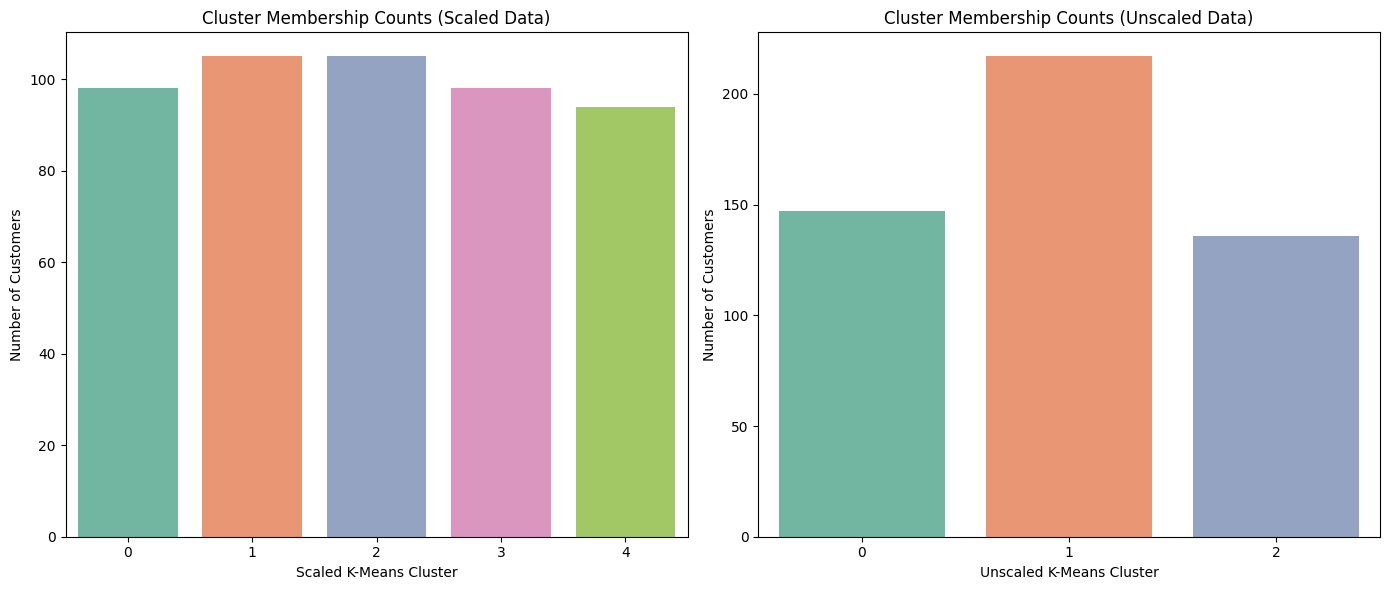

In [188]:
plt.figure(figsize=(14, 6))

# Scaled K-Means Clusters
plt.subplot(1, 2, 1)
sns.countplot(
    x='Scaled_K-Means_Cluster',
    hue='Scaled_K-Means_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Membership Counts (Scaled Data)')
plt.xlabel('Scaled K-Means Cluster')
plt.ylabel('Number of Customers')

# Unscaled K-Means Clusters
plt.subplot(1, 2, 2)
sns.countplot(
    x='Unscaled_K-Means_Cluster',
    hue='Unscaled_K-Means_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Membership Counts (Unscaled Data)')
plt.xlabel('Unscaled K-Means Cluster')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

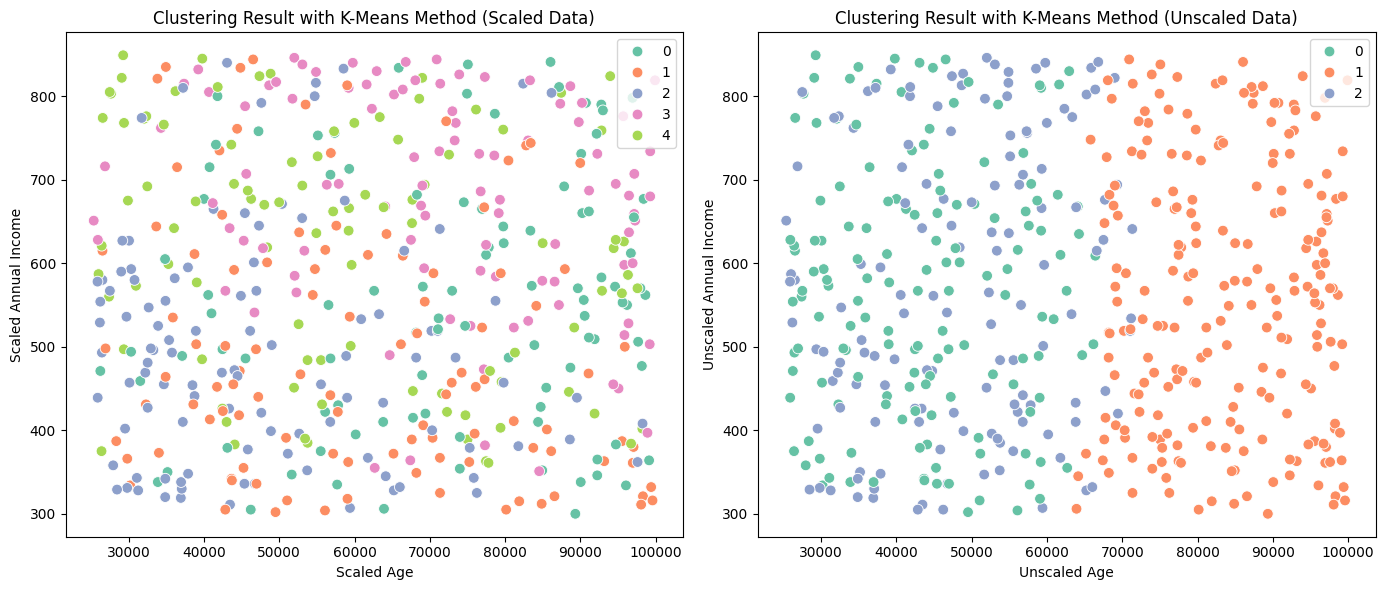

In [189]:
plt.figure(figsize=(14, 6))

# Counts of each unique value in the 'Scaled_K-Means_Cluster' column
plt.subplot(1, 2, 1)
sns.scatterplot(x = "Income", y = "Credit_Score", hue="Scaled_K-Means_Cluster", palette="Set2", data=df, s = 60)
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()

# Counts of each unique value in the 'Unscaled_K-Means_Cluster' column
plt.subplot(1, 2, 2)
sns.scatterplot(x = "Income", y = "Credit_Score", hue="Unscaled_K-Means_Cluster", palette="Set2", data=df, s = 60)
plt.xlabel("Unscaled Age")
plt.ylabel("Unscaled Annual Income")
plt.title("Clustering Result with K-Means Method (Unscaled Data)")
plt.legend()

plt.tight_layout()
plt.show()

In [190]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for Scaled K-Means Cluster
silhouette_scaled = silhouette_score(df_sc_scaled, df['Scaled_K-Means_Cluster'])
print(f"Silhouette Score for Scaled K-Means Cluster: {silhouette_scaled:.3f}")

# Calculate Silhouette Score for Unscaled K-Means Cluster using df_encoded
silhouette_unscaled = silhouette_score(df_encoded, df['Unscaled_K-Means_Cluster'])
print(f"Silhouette Score for Unscaled K-Means Cluster: {silhouette_unscaled:.3f}")

Silhouette Score for Scaled K-Means Cluster: 0.070
Silhouette Score for Unscaled K-Means Cluster: 0.362


1. Summarize and discuss which model is better:

○ Which version (scaled or unscaled) produces clearer cluster separation?

Based on the Silhouette Scores:
Scaled K-Means Cluster: The Silhouette Score was 0.070.
Unscaled K-Means Cluster: The Silhouette Score was 0.362.
The unscaled data produced clearer cluster separation, as indicated by its significantly higher Silhouette Score (0.362) compared to the scaled data (0.070). A higher Silhouette Score suggests that the clusters are more distinct and well-separated.


○ Why does scaling affect the clustering result?

Feature scaling is crucial for distance-based clustering algorithms like K-Means because it prevents features with larger numerical ranges (e.g., 'Income') from disproportionately influencing the distance calculations. Without scaling, such features can dominate the clustering process, leading to less accurate and potentially misleading cluster assignments. Scaling ensures that all features contribute equally to the distance metric, resulting in more meaningful and robust clusters.

2. Analyze and interpret each cluster’s characteristics
# **Unscaled**
### Cluster 0: Mid-Income, Established Customers
*   **Profile:** These customers have a mean age of around **40.5 years** with a wide age distribution (18-63). Their income averages around **$43,512**, placing them in a solid middle-income bracket. Their credit scores are in the average range (mean ~561).
*   **Insight:** This segment likely consists of established individuals or families who are financially stable but not high-earners. They represent a significant portion of the customer base with consistent financial behavior.

### Cluster 1: High-Income, Financially Strong Customers
*   **Profile:** With a mean age of about **40.1 years** and a high average income of around **$83,605**, this cluster represents the most affluent segment. Their credit scores are slightly above average (mean ~571).
*   **Insight:** These are financially robust customers, potentially professionals or business owners, who have strong purchasing power and generally good financial health. They are likely seeking premium services or investment opportunities.

### Cluster 2: Emerging, Value-Conscious Customers
*   **Profile:** This cluster has a slightly younger mean age of **39.2 years**. Their income averages around **$48,408**, which is slightly higher than Cluster 0, indicating a rising middle-income group. Their credit scores are slightly below average (mean ~556).
*   **Insight:** This segment might include younger professionals or families building their financial foundation. They are likely value-conscious and responsive to offers that help them manage finances or save money while growing their assets.

#**Scaled**
### Cluster 1: Younger, High Engagement
*   **Profile:** With an average age of **39.2 years** (18-64), this cluster has an average income of around **$61,353**. Their credit scores are around 568. This group might be characterized by higher online activity or transaction counts given the scaling effects.
*   **Insight:** This segment could represent younger professionals or individuals in their prime working years, actively engaged with banking services and potentially receptive to digital offerings.

### Cluster 2: Budget-Conscious, Older
*   **Profile:** These customers have an average age of **41.3 years** (18-64) and the lowest average income among the scaled clusters, at around **$48,489**. Their credit scores are slightly lower on average (mean ~556).
*   **Insight:** This segment may include customers who are more sensitive to pricing and promotions, potentially seeking value-driven products and services.

### Cluster 3: Youngest, Moderate Income
*   **Profile:** This cluster has the youngest average age at **31.0 years** (18-64) and a moderate average income of about **$62,607**. Their credit scores are around 572.
*   **Insight:** This group might be composed of entry-level professionals or younger families, possibly interested in products that support early career growth or family planning.

### Cluster 4: Older, High Credit Score
*   **Profile:** With an average age of **41.0 years** (18-64), this cluster has an average income of **$64,424** and the highest average credit score (mean ~577) among the scaled clusters.
*   **Insight:** This segment likely consists of financially responsible individuals, potentially nearing retirement or with significant financial assets, who value security and reliable financial products.

3. Managerial Recommendations
**Cluster 0: Established, Moderate Income**

Profile: Average age 44 years, moderate income ($72,548), mid-range credit scores.

Recommendations:
- Products: Offer stable investment options (e.g., CDs, mutual funds), home equity loans, or refinance options. Provide family-oriented financial planning services.
- Marketing: Emphasize security, stability, and long-term benefits. Use direct mail, local community events, and financial planning seminars. Focus on how products can help secure their future or family's future.
- Prioritization: High potential for retention and gradual growth through cross-selling and upselling stable financial products.

**Cluster 1: Younger, High Engagement**
Profile: Average age 39 years, moderate income ($61,353), active online.
Recommendations:
- Products: Digital-first banking solutions, mobile payment integration, user-friendly budgeting tools, and entry-level investment platforms (e.g., robo-advisors).
- Marketing: Leverage social media, influencer partnerships, and targeted digital ads. Emphasize convenience, innovation, and ease of use. Offer rewards for digital engagement.
- Prioritization: High potential for growth by capturing early career earnings and building long-term loyalty through excellent digital experiences.

**Cluster 2: Budget-Conscious, Older**
Profile: Average age 41 years, lowest income ($48,489), slightly lower credit scores.

Recommendations:
- Products: Low-fee banking accounts, debt consolidation services, financial literacy workshops, and personalized budgeting advice. Consider secured credit cards or small, accessible loans.
- Marketing: Focus on value, cost savings, and financial empowerment. Use community outreach, local branch promotions, and educational content. Highlight services that help manage expenses and improve financial health.
- Prioritization: Focus on retention by building trust and supporting their financial well-being. Potential for growth as their financial situation improves with tailored guidance.

**Cluster 3: Youngest, Moderate Income**

Profile: Youngest average age (31 years), moderate income ($62,607), average credit scores.

Recommendations:
- Products: First-time homebuyer programs, student loan refinancing, starter investment accounts, and credit-building products. Offer educational resources on financial planning for young adults.
- Marketing: Digital campaigns focused on life milestones (buying a home, starting a family, career progression). Utilize online financial calculators and personalized advice for future planning.
- Prioritization: Strong potential for future growth as they advance in their careers and build wealth. Focus on establishing early relationships and becoming their primary financial partner.

**Cluster 4: Older, High Credit Score**

Profile: Average age 41 years, moderate income ($64,424), highest credit scores.

Recommendations:
- Products: Premium credit cards, wealth management services, retirement planning, and personalized lending options (e.g., for real estate investments). Offer exclusive benefits and priority service.
- Marketing: Target through exclusive offers, private banking events, and communications emphasizing security, premium service, and maximizing returns. Highlight their financial responsibility and reward it.
- Prioritization: High value for retention and growth through specialized wealth management services and premium product offerings. These customers represent a stable and profitable segment.
